In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_excel("APR 3.xlsx")
df.head()

,Timestamp,battery voltage(V),inverter voltage(V),grid voltage(V),inverter current(A),grid current(A),load current(A),PGrid(W),PLoad(W),accumulated buy power(kWh),accumulated sell power(kWh),accumulated load power(kWh),accumulated self_use power(kWh),batt power(W),PV voltage(V),charger current(A),charger power(W),accumulated power(kWh)
0,2022-04-03 23:59:35,50.4,219.6,0.0,1.6,0.0,0.9,0,0,960,0,6522,5878,72,0.0,0.0,0.0,6090
1,2022-04-03 23:54:06,50.4,220.0,0.0,1.6,0.0,0.8,0,11,960,0,6522,5878,72,0.0,0.0,0.0,6090
2,2022-04-03 23:48:36,50.4,219.8,0.0,1.6,0.0,0.9,0,13,960,0,6522,5878,72,0.0,0.0,0.0,6090
3,2022-04-03 23:44:32,50.4,219.8,0.0,1.6,0.0,0.9,0,0,960,0,6522,5878,73,0.0,0.0,0.0,6090
4,2022-04-03 23:38:59,50.4,219.9,0.0,1.6,0.0,0.9,0,17,960,0,6522,5878,73,0.0,0.0,0.0,6090


In [3]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Descriptive statistics 

desc_stats = df.describe()

# Mode
mode_values = df.mode().iloc[0] 

# Quartiles
quartiles = df.quantile([0.25, 0.5, 0.75])

print("Summary Statistics:\n", desc_stats)
print("\nMode:\n", mode_values)
print("\nQuartiles:\n", quartiles)

Summary Statistics:
        battery voltage(V)  inverter voltage(V)  grid voltage(V)  \
count          256.000000           256.000000            256.0   
mean            51.847266           219.824609              0.0   
std              2.022034             0.118072              0.0   
min             49.600000           219.000000              0.0   
25%             50.000000           219.800000              0.0   
50%             50.800000           219.800000              0.0   
75%             54.500000           219.900000              0.0   
max             55.400000           220.100000              0.0   

       inverter current(A)  grid current(A)  load current(A)  PGrid(W)  \
count           256.000000            256.0       256.000000     256.0   
mean              1.796875              0.0         1.138672       0.0   
std               0.417732              0.0         0.541918       0.0   
min               1.600000              0.0         0.800000       0.0   
25%  

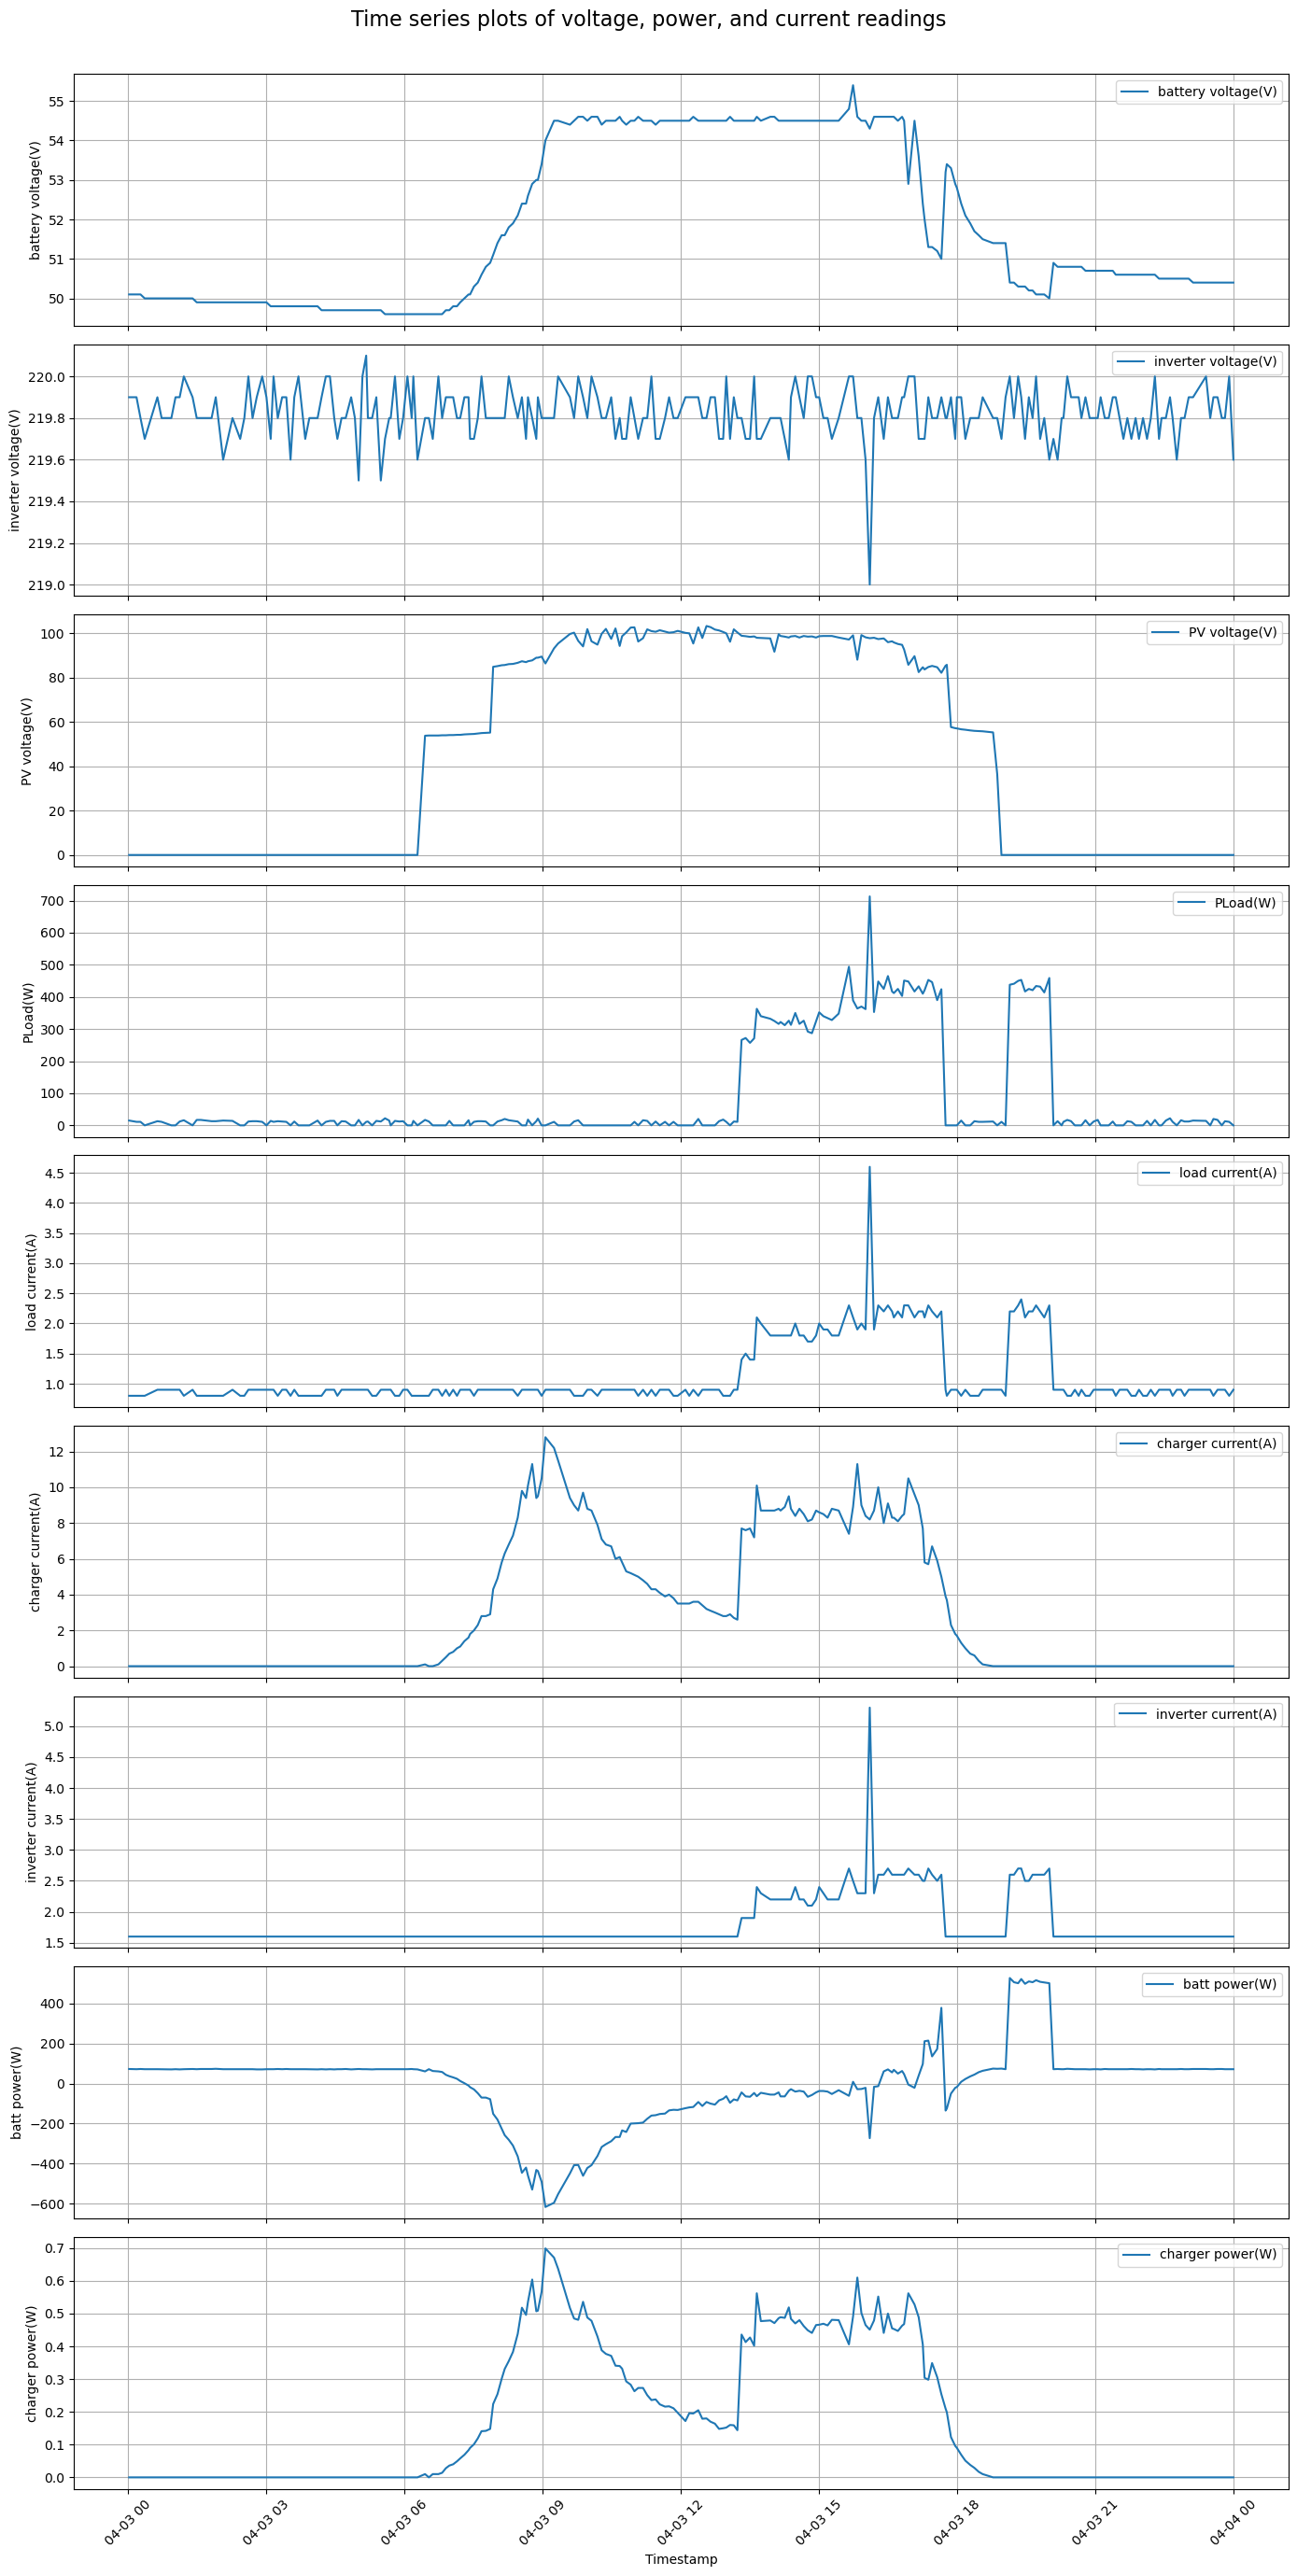

In [6]:
# Visuals of necessary parameters in time
columns_to_plot = [
    'battery voltage(V)',
    'inverter voltage(V)',
    'PV voltage(V)',
    'PLoad(W)',
    'load current(A)',
    'charger current(A)',
    'inverter current(A)',
    'batt power(W)',
    'charger power(W)'
]

# Create subplots: one for each column
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(14, 3*num_plots), sharex=True)

for i, col in enumerate(columns_to_plot):
    axes[i].plot(df['Timestamp'], df[col], label=col, color='tab:blue')
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

axes[-1].set_xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('Time series plots of voltage, power, and current readings', y=1.02, fontsize=16)
plt.show()

## 1. Peak Generation Analysis

Best metrics to detect "high generation periods" are:

PV voltage(V): meaning strong sun, panels are generating

charger current(A): actual charging current (shows real power captured)

Measurement for PGrid(W) isn't available, so it won't be considered

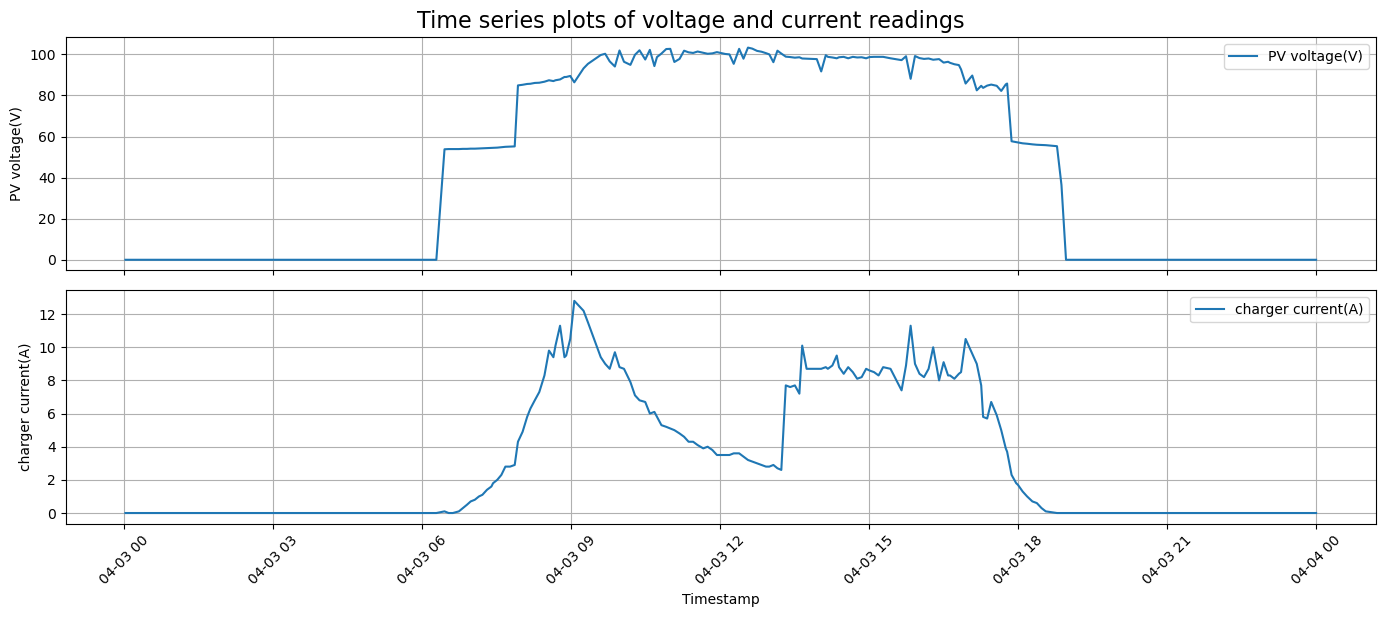

In [7]:
# Visuals of necessary parameters in time
columns_to_plot = [
    'PV voltage(V)',
    'charger current(A)'
]

# Create subplots: one for each column
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(14, 3*num_plots), sharex=True)

for i, col in enumerate(columns_to_plot):
    axes[i].plot(df['Timestamp'], df[col], label=col, color='tab:blue')
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

axes[-1].set_xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('Time series plots of voltage and current readings', y=1.02, fontsize=16)
plt.show()

#### Analysis of Peak Power Generation Periods
During the periods of highest power generation, the system recorded notable patterns:

1. Charger Current

Time ranges: Mainly between 8:15 AM – 10:43 AM followed a drop and then 13:19 PM – 17:39 PM

Values observed: Peaked around 6.80 A – 5.80 A in the morning and 7.70 A – 5.40 A in the afternoon.

2. PV Voltage

Time range: From 8:15 AM – 17:44 PM

Values observed: Stayed relatively stable between 86.10 V – 85.40 V.


These patterns show that the highest power generation typically occurs in two main blocks: late morning and early-to-late afternoon, supported by steady PV voltage and strong charger currents during these times.

Possible reasons for drop in charger current
Battery approaching full charge, causing the charger to reduce current automatically.

Inverter or controller protection logic, temporarily limiting current to prevent overcharging.

 ### 2. Load Pattern Recognition
    
Best metrics to detect "Load Pattern" are:

PLoad(W): The load demand from appliances.
    
load current(A): Optional for more view.



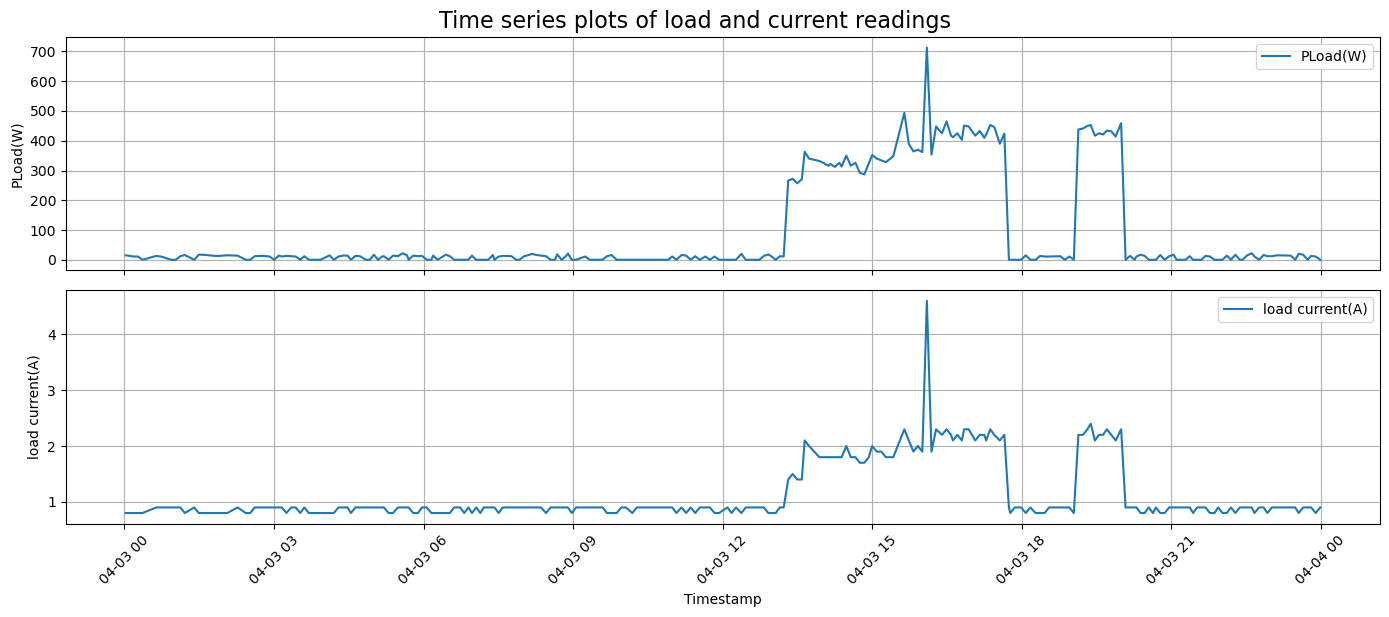

In [8]:
# Visuals of necessary parameters in time
columns_to_plot = [
    'PLoad(W)',
    'load current(A)'
]

# Create subplots: one for each column
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(14, 3*num_plots), sharex=True)

for i, col in enumerate(columns_to_plot):
    axes[i].plot(df['Timestamp'], df[col], label=col, color='tab:blue')
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

axes[-1].set_xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('Time series plots of load and current readings', y=1.02, fontsize=16)
plt.show()

#### Analysis of Load Pattern.

1. PLoad (Load Power)

Main afternoon period: 13:19 – 17:39, with values from 266 W – 424 W.

Peak: Spiked to 713 W at 16:05.

Evening period: 19:08 – 19:59, with values around 438 W – 459 W.

2. Load Current

Main afternoon period: 13:19 – 17:39, ranging from 1.50 A – 2.20 A.

Peak: Reached 4.60 A at 16:05.

Evening period: 19:08 – 19:59, values between 2.20 A – 2.30 A.

Possible reasons for these peaks
Late afternoon peak (16:05):
Likely due to simultaneous operation of high‑consumption appliances, such as air conditioners, pumps, or heavy office equipment when occupants are most active.

Evening peak (19:08 – 19:59):
Possibly linked to lighting loads turning on after sunset, combined with entertainment devices (e.g., televisions, computers) and household appliances used during evening routines.

## 3. Load Shaving Opportunities

Best metrics to detect Load Shaving Opportunities are:

PLoad(W)
batt power(W)
PV voltage(V)
charger power(W)


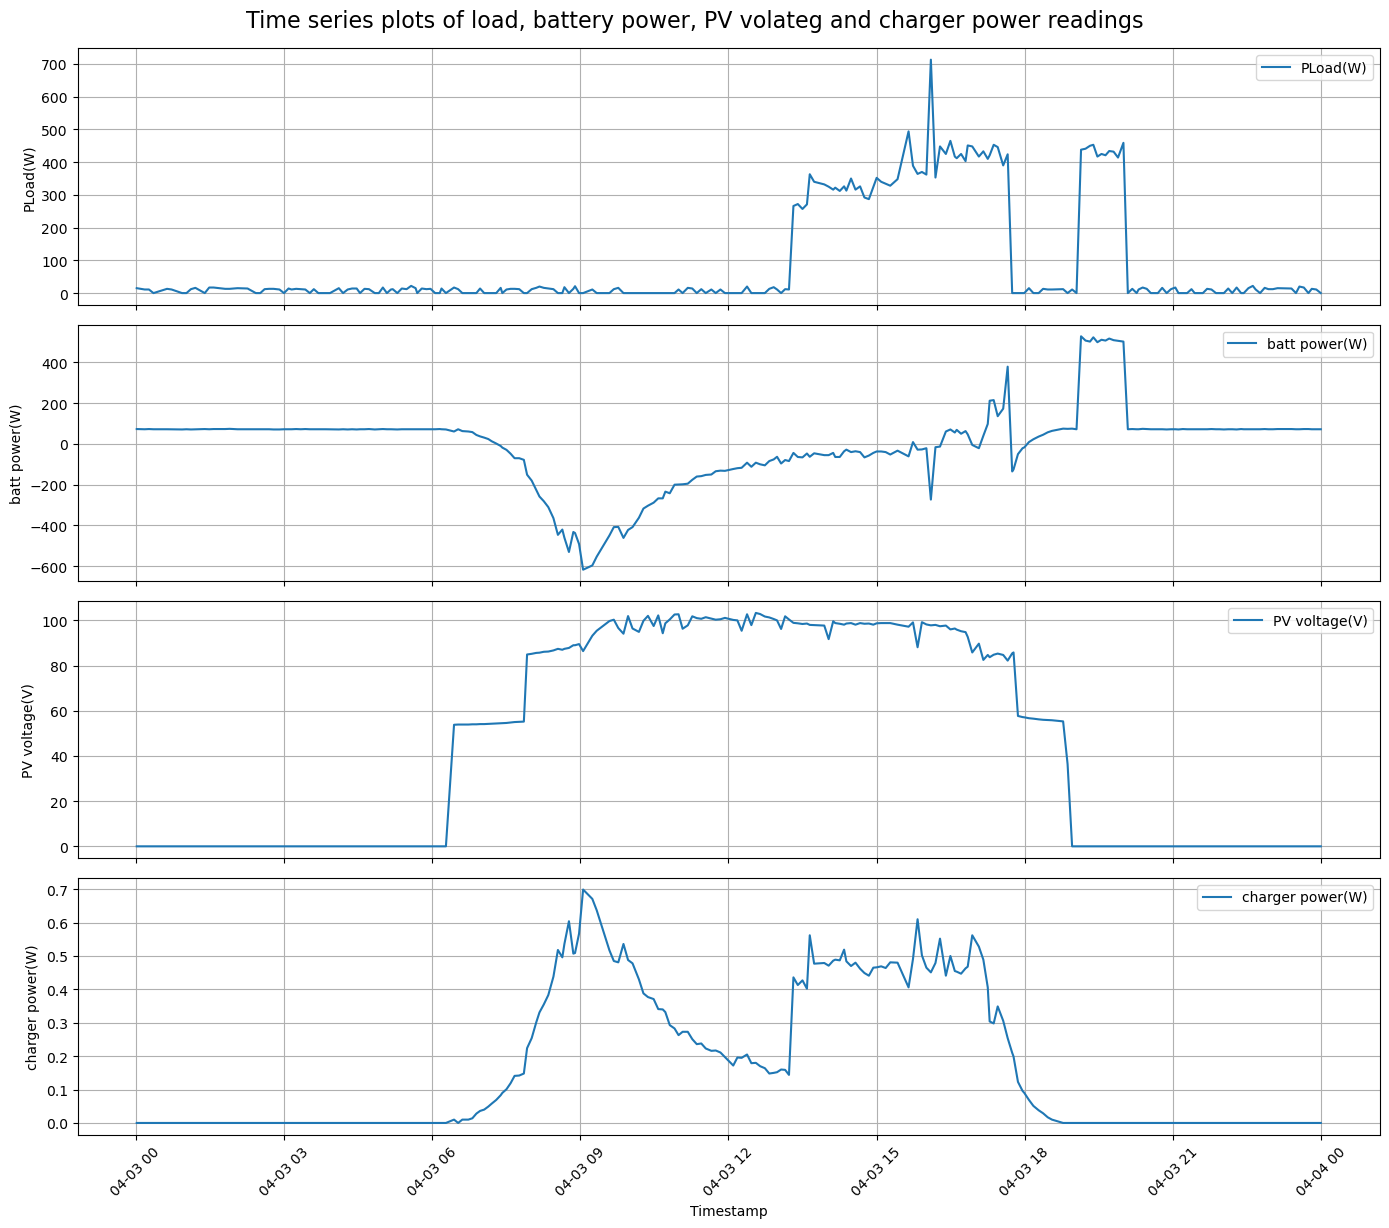

In [10]:
# Visuals of necessary parameters in time
columns_to_plot = [
    'PLoad(W)',
    'batt power(W)',
    'PV voltage(V)',
    'charger power(W)'
]

# Create subplots: one for each column
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(14, 3*num_plots), sharex=True)

for i, col in enumerate(columns_to_plot):
    axes[i].plot(df['Timestamp'], df[col], label=col, color='tab:blue')
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

axes[-1].set_xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('Time series plots of load, battery power, PV volateg and charger power readings', y=1.02, fontsize=16)
plt.show()

#### Analysis of Load shaving.

The best time to implement load shaving is in the afternoon window from 13:19 to 17:39, when solar generation is strong (charger current peaks around 7.7 A and stays above 5.4 A) and PV voltage remains high throughout. During this period, the battery actively discharges to support load demand, reaching +379 W by 17:39, thanks to strong PV generation that keeps it charged and ready. Load demand is also at its highest, with PLoad values ranging from 266–424 W and peaking at 713 W at 16:05.

This combination of high PV generation, active battery support, and peak demand makes the afternoon ideal for load shaving without risking battery depletion.

In contrast, evening shaving (19:08–19:59) isn’t recommended because PV voltage drops to near zero, leaving the battery as the sole power source, which discharges up to +528 W without a chance to recharge until the next day — increasing the risk of deep discharge and reducing battery lifespan.

## System Optimization Timing

Again the best metrics to detect windows for system optimizing are:

PLoad(W) batt power(W) PV voltage(V) charger power(W)

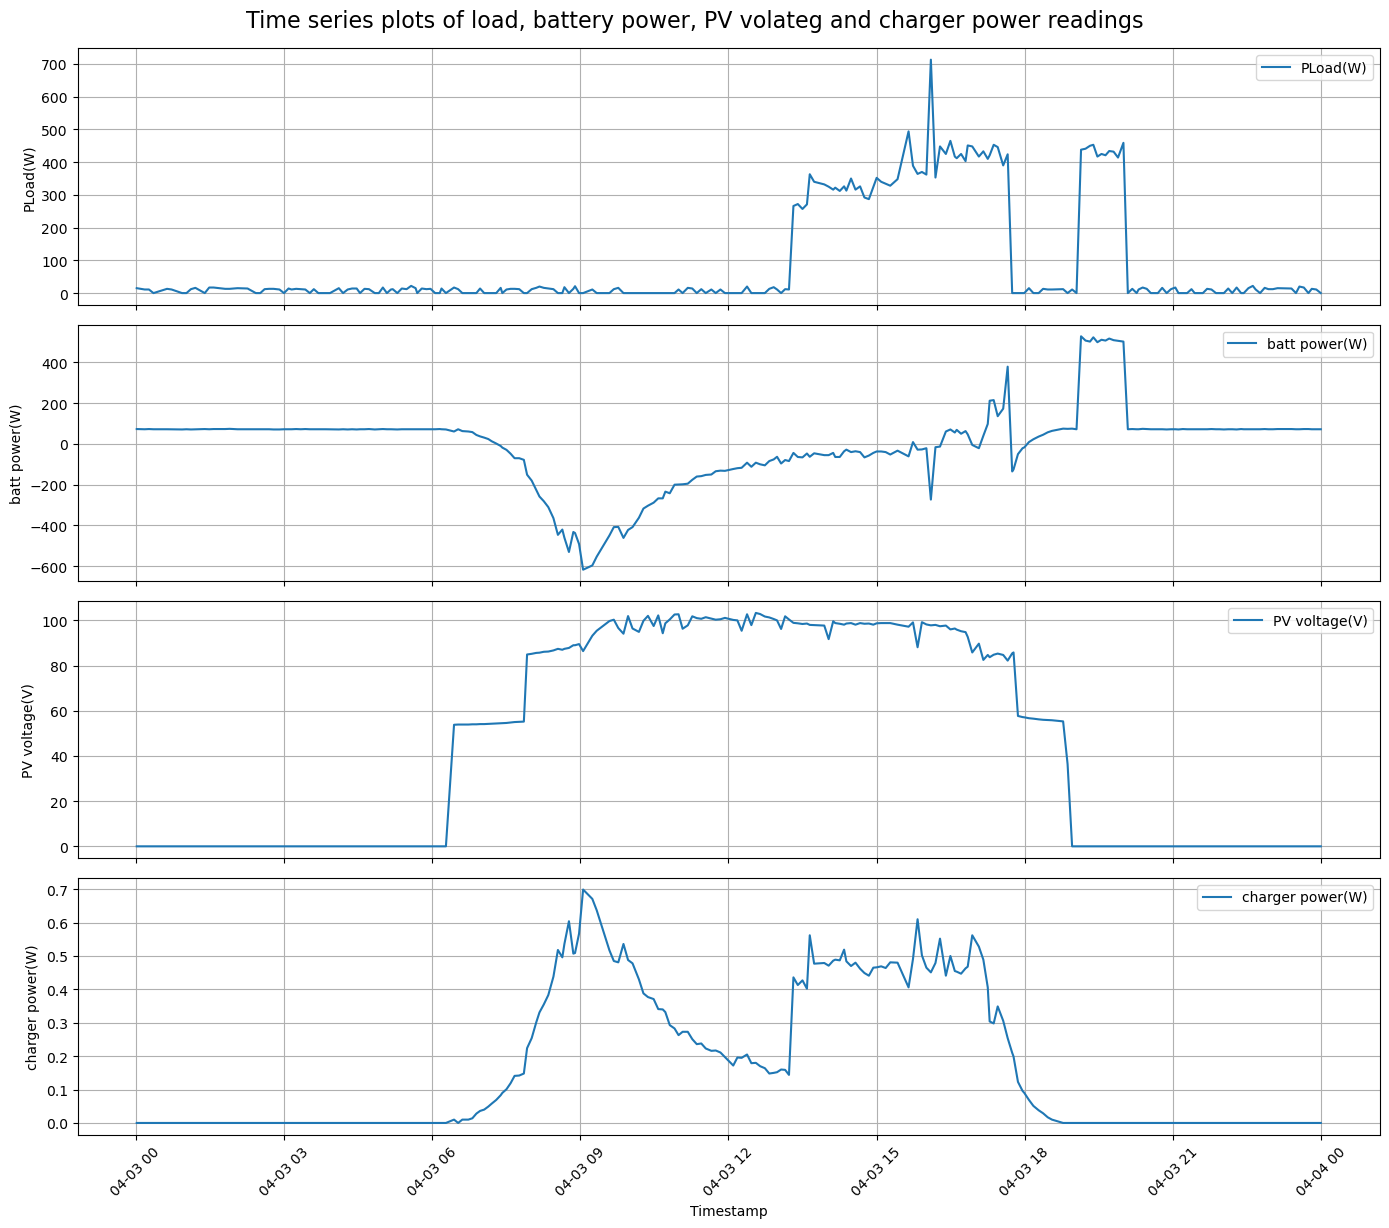

In [12]:
# Visuals of necessary parameters in time
columns_to_plot = [
    'PLoad(W)',
    'batt power(W)',
    'PV voltage(V)',
    'charger power(W)'
]

# Create subplots: one for each column
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(14, 3*num_plots), sharex=True)

for i, col in enumerate(columns_to_plot):
    axes[i].plot(df['Timestamp'], df[col], label=col, color='tab:blue')
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

axes[-1].set_xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('Time series plots of load, battery power, PV volateg and charger power readings', y=1.02, fontsize=16)
plt.show()

#### Analysis for system optimization.

The most effective period to optimize system performance is in the afternoon window (13:19–17:39) when solar generation is strong, enabling the inverter to supply high load demand mainly from PV, while the battery can safely discharge (reaching +379 W) without risking deep depletion thanks to ongoing PV support.

During this time, load increments (like the peak at 16:05) can be covered smoothly by coordinated battery dispatch and inverter operation.

In contrast, in the evening (19:08–19:59), it’s better to limit battery dispatch since there’s no PV generation, and the battery becomes the sole power source — increasing the risk of deep discharge and reducing battery lifespan.

## Battery Usage & Health Assessment

Best metrics to detect Load Shaving Opportunities are:

batt power(W), battery voltage(V), PLoad(W), charger power(W)

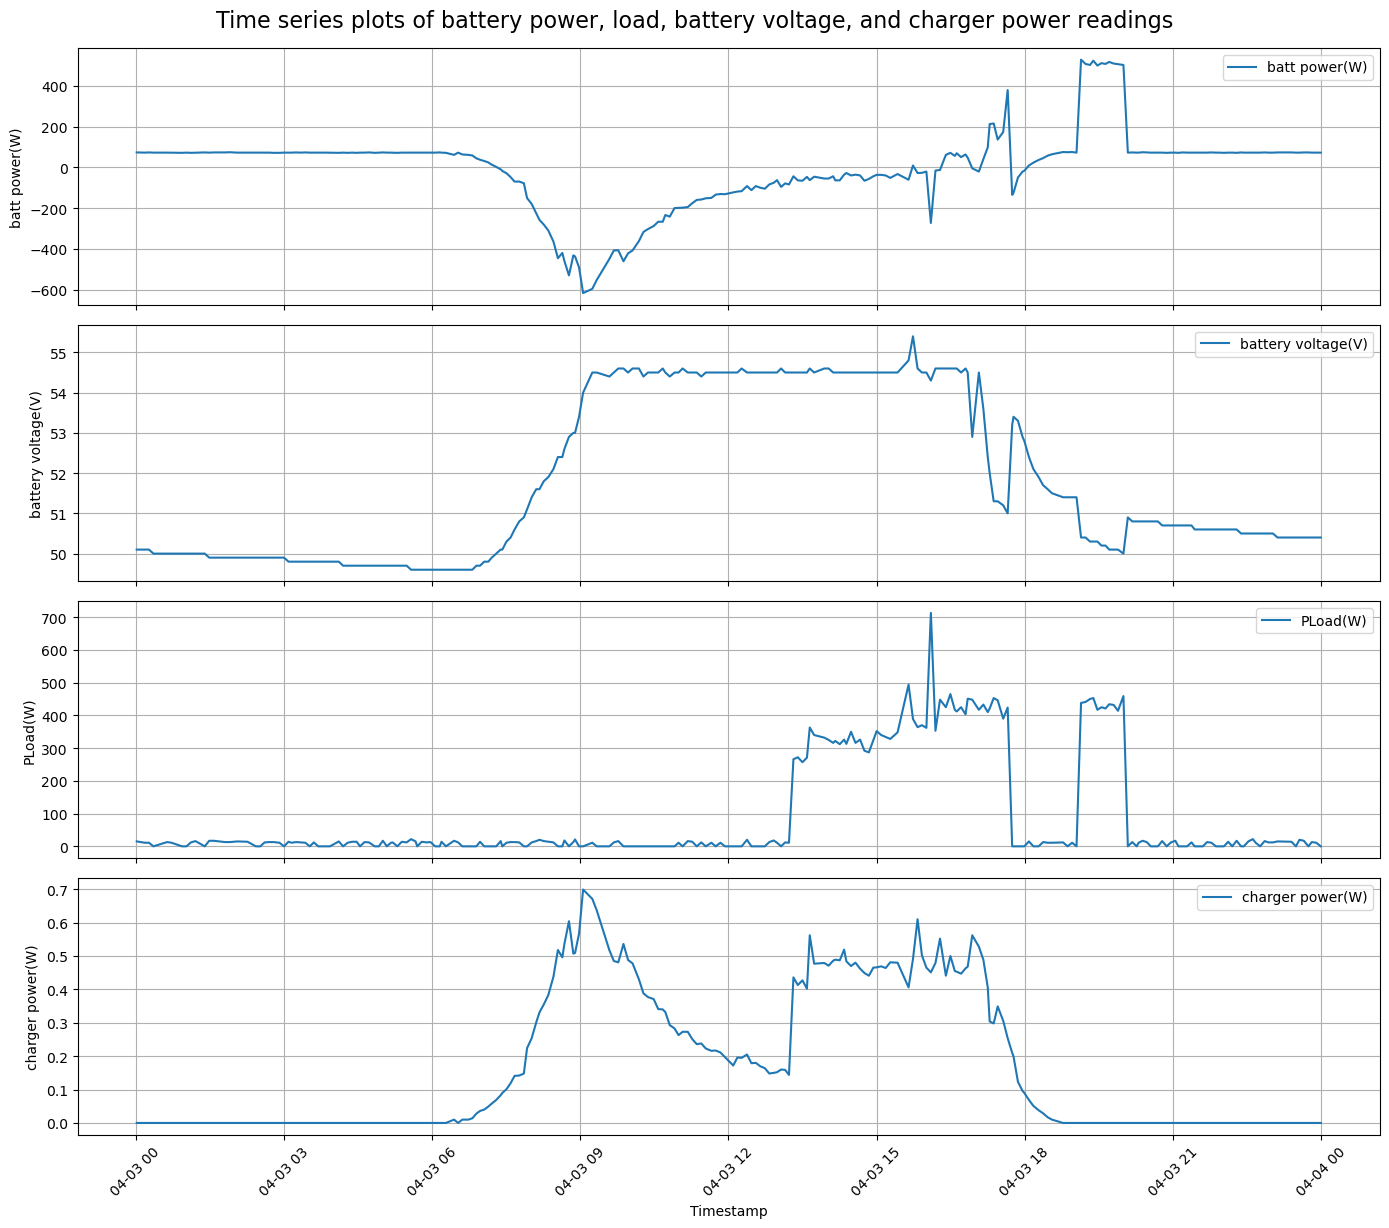

In [17]:
# Visuals of necessary parameters in time
columns_to_plot = [
    'batt power(W)',
    'battery voltage(V)',
    'PLoad(W)',
    'charger power(W)'
]

# Create subplots: one for each column
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(14, 3*num_plots), sharex=True)

for i, col in enumerate(columns_to_plot):
    axes[i].plot(df['Timestamp'], df[col], label=col, color='tab:blue')
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

axes[-1].set_xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('Time series plots of battery power, load, battery voltage, and charger power readings', y=1.02, fontsize=16)
plt.show()

#### Analysis of battery usage.

i. Charging pattern & utilization:
Morning (≈ 09:03): battery power sharply negative (–617 W) → battery charges strongly supported by PV (charger power peaks ~0.7 W).

Afternoon (≈ 13:19–17:39): charger power stable (0.44–0.61 W) → continues to recharge the battery while also covering loads (PLoad ~266–424 W).

Battery voltage holds ~54.5 V for most of the afternoon → indicates battery remains in healthy mid-to-high SOC.

Battery discharges moderately in the afternoon (batt power moving from negative towards small positive) to support higher loads.

ii. Discharge & load :
At 16:05, load spikes sharply to 713 W:

Battery supports by reducing charging (batt power rises from –617 W earlier to only –273 W).

Battery doesn’t immediately fully discharge → still partly relies on PV.

Later, batt power becomes positive (71–379 W) by 17:39 → battery actively discharges to cover load.

Evening (19:02–19:59): batt power sharply rises to ~528 W → battery supports evening peak since there’s no PV (charger power=0).

iii. Charger power:
PV generation (through charger power) is strongest in:

Morning (peak ~0.7 W at 09:03)

Afternoon stable generation (0.44–0.61 W until 17:39).

This allows frequent charging and keeps the battery from deep discharge.

By evening, charger power drops to zero → battery alone supports evening load.


##### Battery health signs.

Healthy behavior:

Battery mostly cycles between ~50–55 V (healthy voltage window).

Charging is not overly aggressive and battery doesn’t fall to critically low voltage.

Afternoon load shaving happens when PV is still supporting, avoiding deep night discharges.


##### Anomalies, degradation signals, or inefficiencies:

Around 16:56, there’s a sharp voltage dip to 52.90 V despite charger power still being available, then it quickly recovers back to ~54.50 V. This could indicate a sudden high load spike or momentary battery strain, which may stress the battery if it happens often.

At 15:44, battery voltage briefly spikes to 55.40 V — possibly as the battery nears full SOC and the charge controller tapers charging, but it could also reflect a voltage overshoot that should be monitored.

At 17:44, batt power briefly turns negative (–135 W) right after being positive, suggesting the system briefly tried to recharge the battery before sunset. This could point to inverter or charge controller logic reacting to fast-changing conditions.

In the evening peak (19:02–19:59), the battery delivers a sustained high discharge (~528 W) when there’s no PV generation, relying entirely on stored energy. While this helps meet demand, repeated heavy evening discharges could accelerate battery wear over time.

## Bonus Insight

1. Additional correlations, patterns, or inefficiencies.

a) PV generation aligns directly with load pattern — but midday dip could be better used. 
Your charger power shows a midday dip between morning (09:03) peak and afternoon ramp (13:19).

Load demand is low in that window - there’s an unused generation surplus that isn’t fully stored because the battery is already near full SOC. 
System inefficiency: PV surplus not captured; battery SOC management could let the battery discharge slightly before noon to absorb more PV power midday.

b) Afternoon load peak (16:05) happens just as PV begins to soften. 
Peak PLoad of 713 W at 16:05 aligns with charger current starting to drop - battery forced to support.

Small design risk: if the battery were at lower SOC that day, it might not catch the peak.

Operational insight: consider shifting part of peak load earlier (~14:30–15:30) when charger power is still strong.

c) Battery rarely reaches very high or very low SOC — but voltage spikes suggest controller calibration issue. 
Battery voltage briefly spikes to 55.40 V at 15:44, and dips to 52.90 V at 16:56.

These quick changes happen when charger current is still available, suggesting controller sensitivity or high instantaneous loads.

Not damaging immediately, but repeated voltage overshoot and dips can cause uneven aging in battery cells.

d) Evening sustained discharge is a structural inefficiency.
Even though you already note it's risky, the deeper issue is: evening loads are stable (≈ 528 W) - this could be shifted to day with scheduling or timer loads (e.g., water heating, EV charging, laundry).

Evening discharge makes battery the only source; repeated daily use at high discharge current may slowly reduce capacity.

e) Battery dispatch sometimes toggles quickly between charging & discharging. 
Example: batt power becomes positive (379 W) by 17:39, then sharply negative (–135 W) at 17:44.

Possible inefficiency: inverter or charge controller may not be finely tuned → could cause small round‑trip losses or stress.

f) Load profile could be flattened.

Afternoon: sharp 713 W peak followed by drop to 266–424 W.

Smoother load profile would reduce battery discharge rate & extend lifespan.


2. Beyond the data — what others might miss.

a) PV voltage is very stable (≈ 86 V), but charger current varies. 
Shows PV modules are well‑matched and sun is stable; charger current modulation comes from controller decisions, not PV instability.

This points to the system being slightly oversized on the panel side, which is good — but also hints controller settings might be too conservative.

b) Battery health hidden risk:
You see battery never drops <50 V → good. But repeated high‑rate discharges (528 W in evening) even if SOC stays high can cause chemical aging (especially if battery is lead‑acid).

Users might only watch SOC and voltage, ignoring actual discharge current & depth of cycles which drives aging.

c) Opportunity to add small smart load (dump load). 
During midday PV surplus when charger power dips & battery is full, a timed or smart dump load (e.g., water heater) could capture otherwise wasted PV.

d) Correlation: battery voltage dips almost always coincide with load spikes, even with PV. 
Confirms load control is as important as generation.

System could benefit from simple load‑shedding logic: momentary spikes at 16:05 could be flattened.

e) System controller logic may be slightly reactive instead of predictive. 
Battery switches from discharge to charge rapidly (17:39–17:44), reacting to sun drop.

Predictive logic could pre‑emptively charge battery a bit more before sunset.

Users might be surprised if they add a new large appliance; system may under‑perform without re‑sizing.